In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('tesla.csv')
df.head ()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
df.shape

(1692, 7)

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [11]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

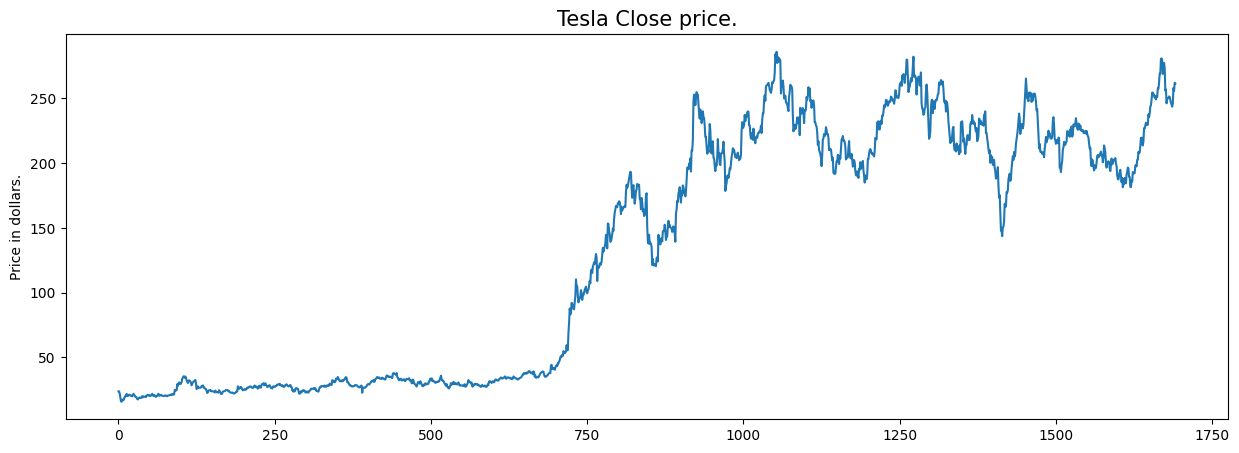

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [13]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [14]:
df['MA_for_250_days']=df['Adj Close'].rolling(250).mean()

In [15]:
df['MA_for_250_days'][0:250].tail()

245         NaN
246         NaN
247         NaN
248         NaN
249    24.44808
Name: MA_for_250_days, dtype: float64

In [16]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name}of tesla data")

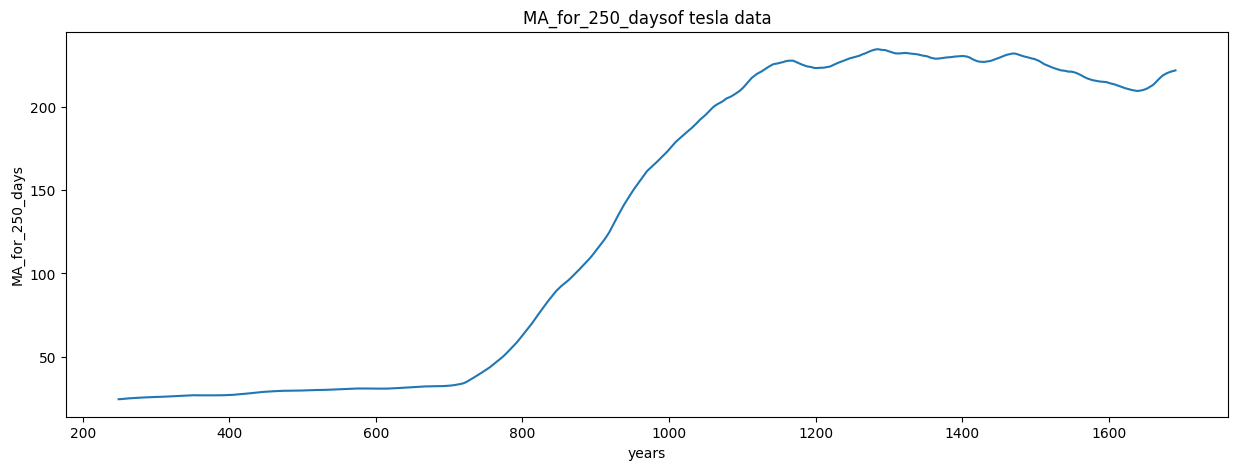

In [17]:
plot_graph((15,5), df['MA_for_250_days'],'MA_for_250_days' )


<Figure size 640x480 with 0 Axes>

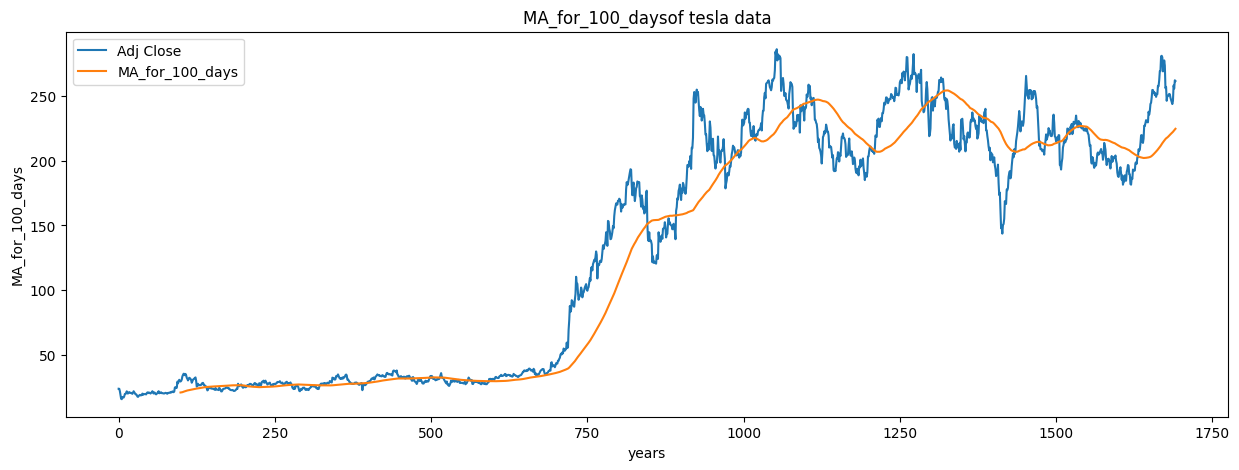

In [18]:
df['MA_for_100_days'] = df['Adj Close'].rolling(100).mean()
plot_graph((15,5), df[['Adj Close','MA_for_100_days']],'MA_for_100_days' )

<Figure size 640x480 with 0 Axes>

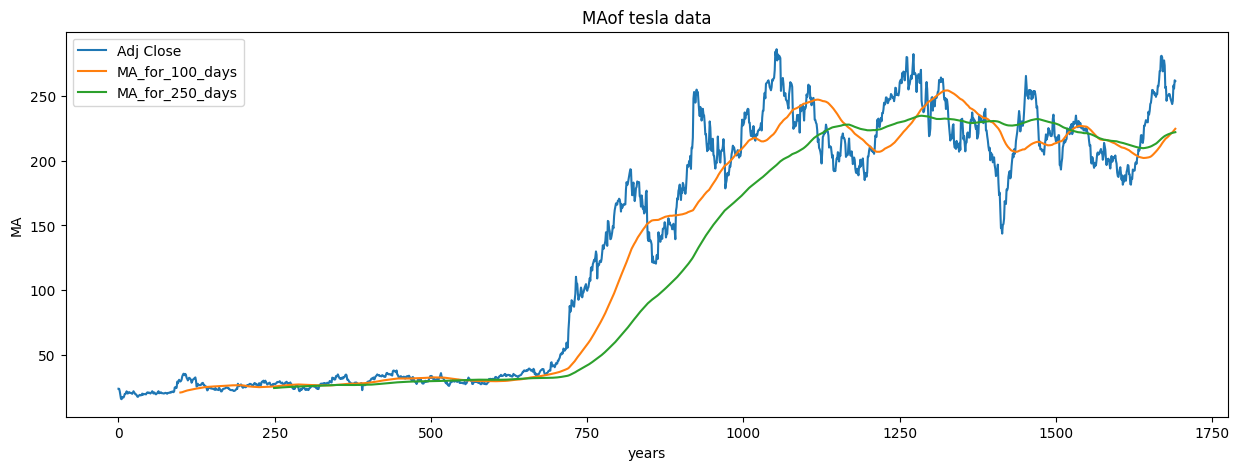

In [19]:
plot_graph((15,5), df[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA' )

In [20]:
df['percentage_change_cp'] = df['Adj Close'].pct_change()
df[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
0,23.889999,NaN
1,23.830000,-0.002511
2,21.959999,-0.078473
3,19.200001,-0.125683
4,16.110001,-0.160937


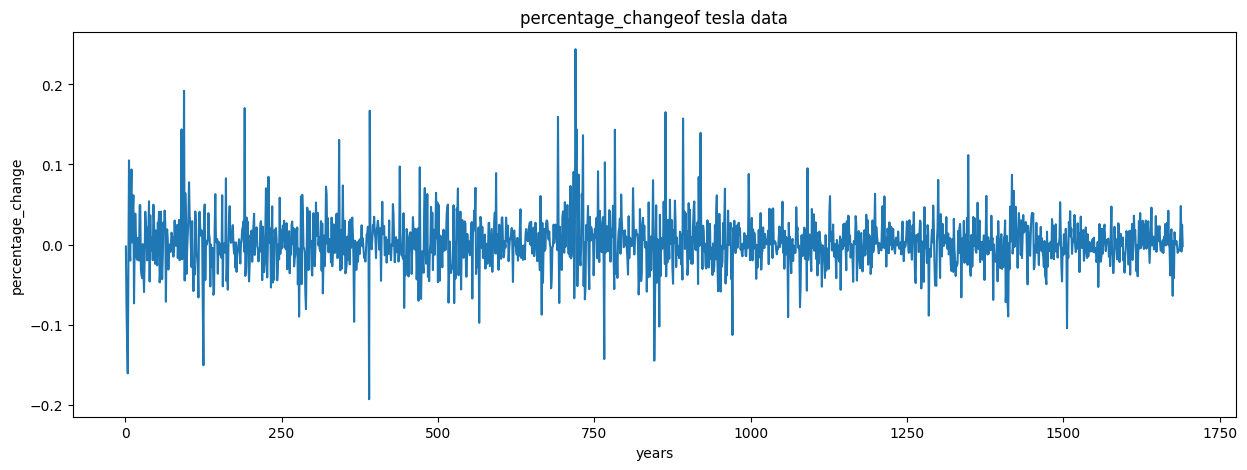

In [21]:
plot_graph((15,5), df['percentage_change_cp'], 'percentage_change')

In [22]:
Adj_Close_price = df[['Adj Close']]

In [23]:
max(Adj_Close_price.values),min(Adj_Close_price.values)

(array([286.040009]), array([15.8]))

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_Close_price)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]], shape=(1692, 1))

In [25]:
len(scaled_data)

1692

In [26]:
X_data = []
y_data = []
for i in range(100 ,len(scaled_data)):
    X_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
X_data, y_data = np.array(X_data), np.array(y_data)
    

In [27]:
X_data[0],y_data[0]

(array([[0.02993635],
        [0.02971433],
        [0.02279455],
        [0.01258141],
        [0.00114713],
        [0.        ],
        [0.00614268],
        [0.00592066],
        [0.00462551],
        [0.00865897],
        [0.01494967],
        [0.01513469],
        [0.01791   ],
        [0.02260953],
        [0.01665186],
        [0.01635583],
        [0.01924215],
        [0.02031528],
        [0.01905714],
        [0.01757696],
        [0.01820603],
        [0.01683689],
        [0.01531972],
        [0.01894612],
        [0.02275755],
        [0.02020426],
        [0.01720693],
        [0.01402457],
        [0.01406157],
        [0.01195234],
        [0.00777087],
        [0.00666075],
        [0.00932504],
        [0.01102724],
        [0.01239639],
        [0.01099023],
        [0.01106424],
        [0.01221137],
        [0.01602279],
        [0.01258141],
        [0.0151717 ],
        [0.01461664],
        [0.01443162],
        [0.01506069],
        [0.01361752],
        [0

In [28]:
int(len(X_data)*0.7)

1114

In [29]:
4908-int(len(X_data)*0.7)

3794

In [30]:
4908-100-int(len(X_data)*0.7)

3694

In [31]:
splitting_len = int(len(X_data)*0.7)
X_train = X_data[:splitting_len]
y_train = y_data[:splitting_len]

X_test = X_data[splitting_len:]
y_test = y_data[splitting_len:]

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1114, 100, 1)
(1114, 1)
(478, 100, 1)
(478, 1)


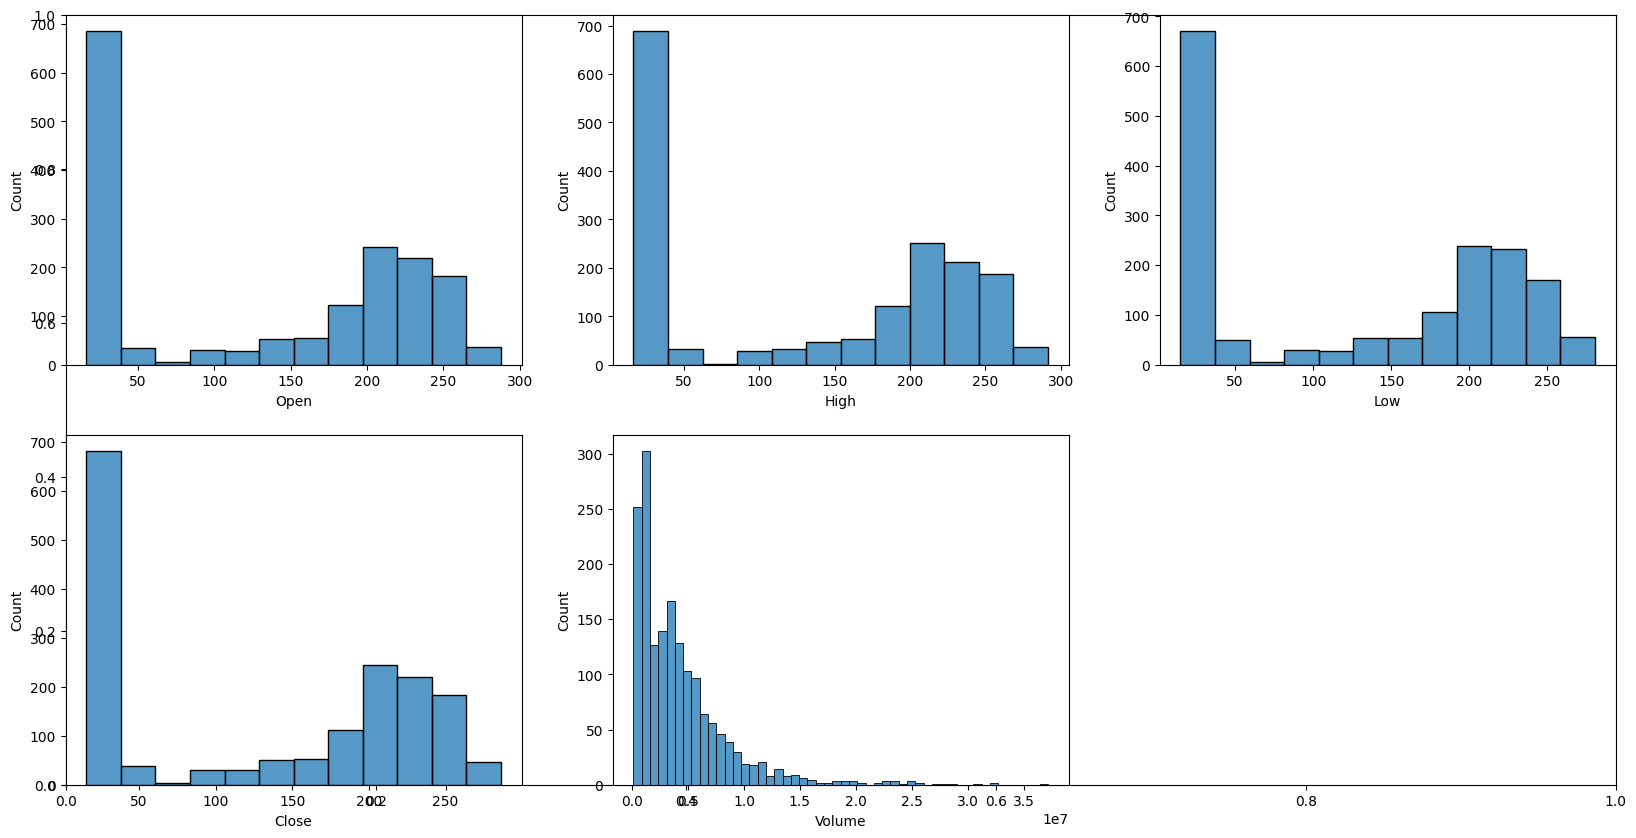

In [57]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(df[col])
plt.show()

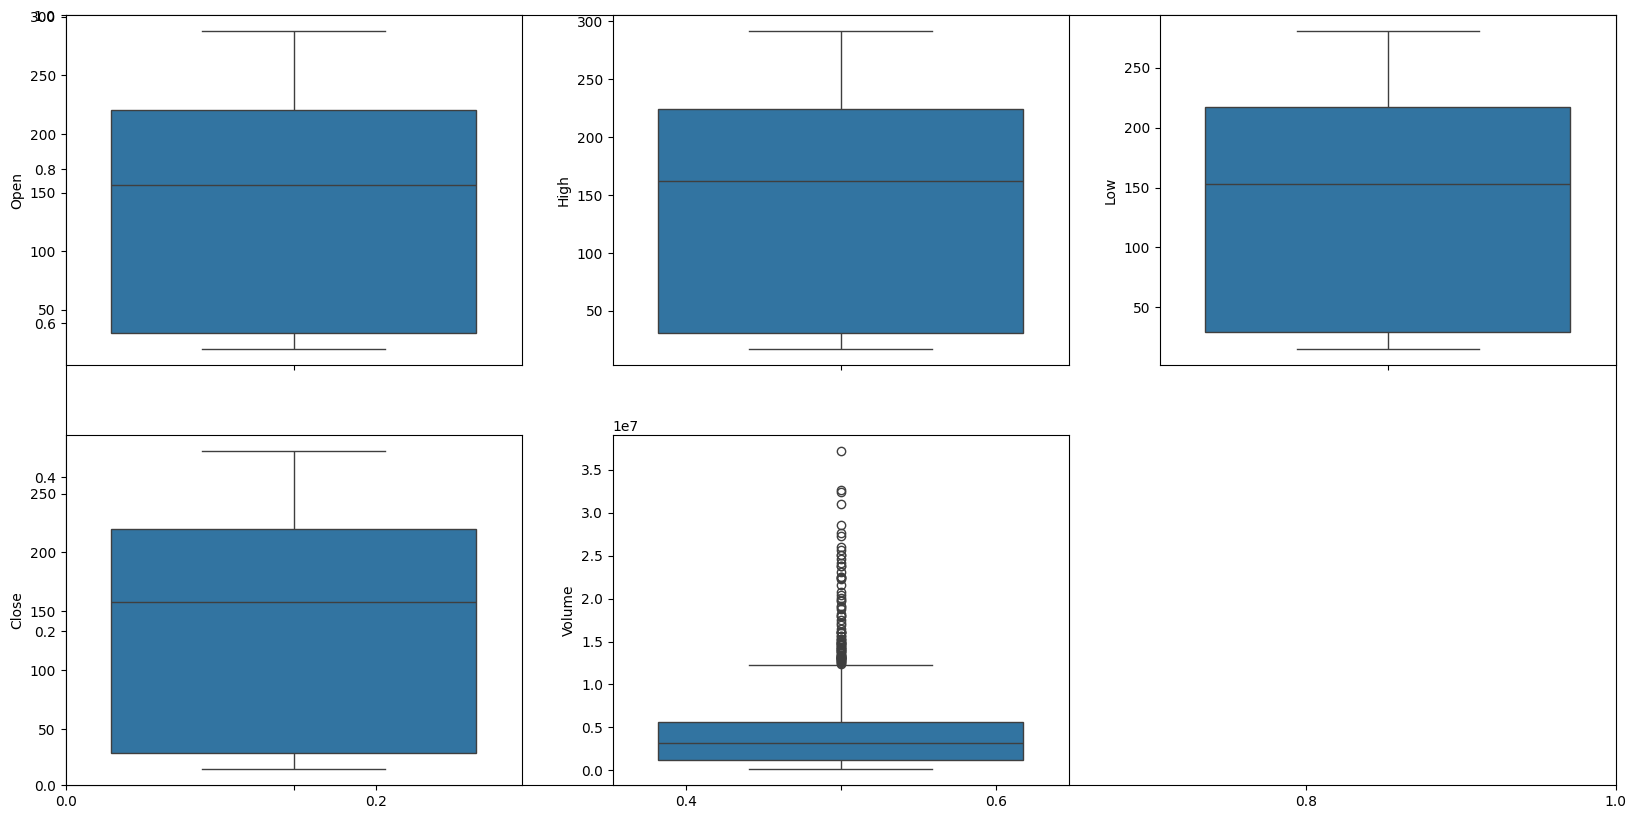

In [34]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [35]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,MA_for_250_days,MA_for_100_days,percentage_change_cp,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,NaN,NaN,NaN,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,NaN,NaN,-0.002511,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,NaN,NaN,-0.078473,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,NaN,NaN,-0.125683,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,NaN,NaN,-0.160937,6,7,2010


In [36]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,MA_for_250_days,MA_for_100_days,percentage_change_cp,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,NaN,NaN,NaN,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,NaN,NaN,-0.002511,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,NaN,NaN,-0.078473,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,NaN,NaN,-0.125683,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,NaN,NaN,-0.160937,6,7,2010,0


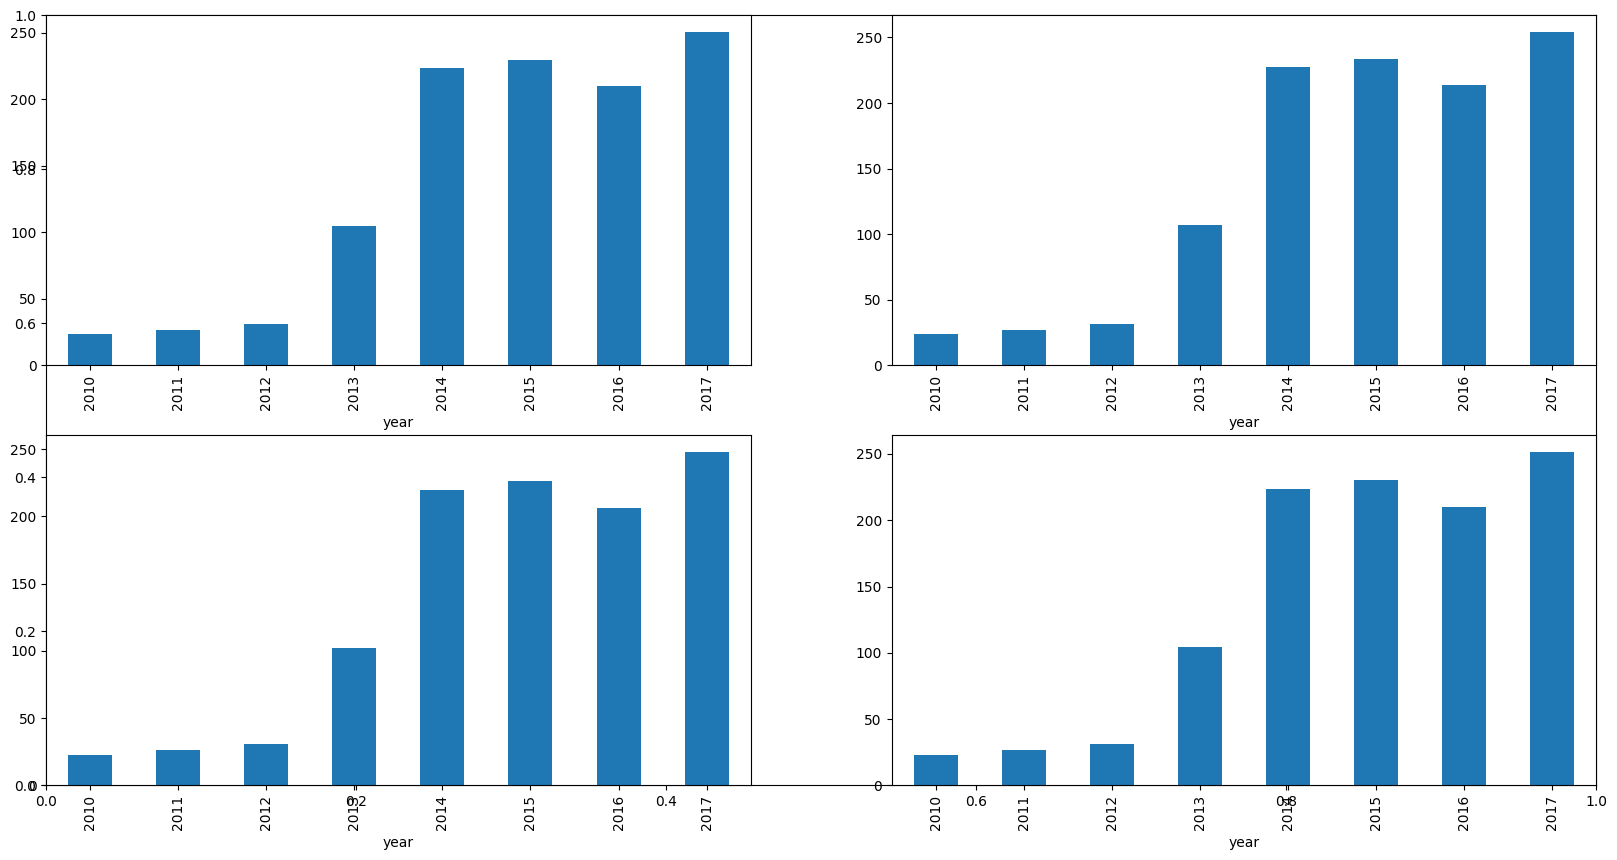

In [37]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

# This code is modified by Susobhan Akhuli

In [38]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Adj Close,MA_for_250_days,MA_for_100_days,percentage_change_cp,day,month,year
is_quarter_end,,,,,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,130.797709,132.523322,132.439066,0.002311,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,135.673269,137.027674,132.793251,0.001239,15.657244,7.584806,2013.314488


In [39]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

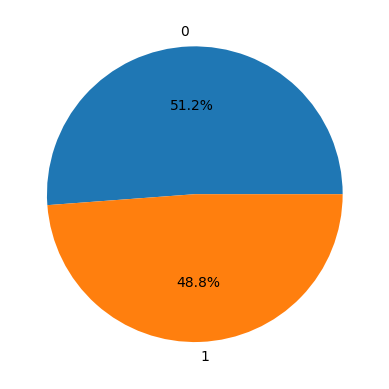

In [40]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

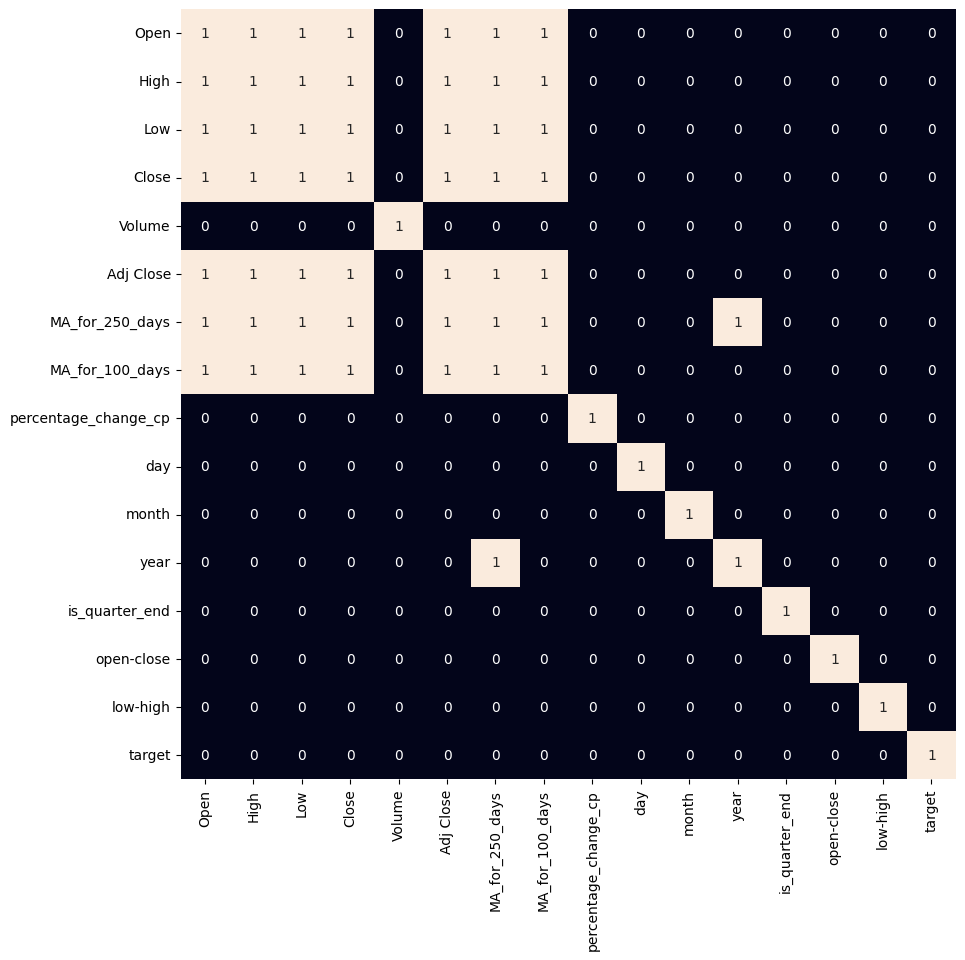

In [41]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

# This code is modified by Susobhan Akhuli

In [46]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1522, 3) (170, 3)


In [47]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5191606217616581
Validation Accuracy :  0.5436730123180291

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47199913644214164
Validation Accuracy :  0.4458986562150056

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Train

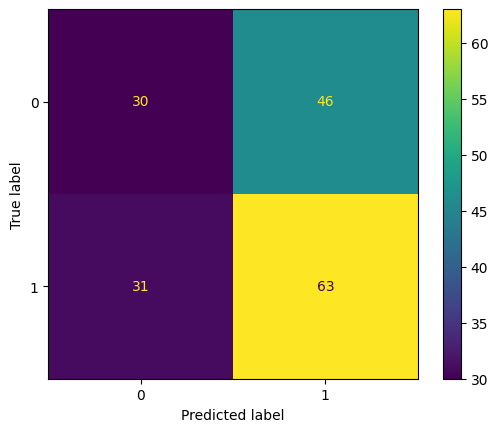

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

# This code is modified by Susobhan Akhuli